# Scikit-learn的简介: 基于Python的机器学习

在本节中会介绍Scikit-learn的基本原理，它是一个集成很多工具的，用于用Python实现机器学习算法的广泛使用的包。详情请参考http://scikit-learn.org 。

## 概述

**主要目标**：介绍机器学习的中心思想以及它们是怎样通过Scikit-learn集成进Python的。

    - 机器学习的定义
    - Scikit-learn中的数据表示
    - Scikit-learn的API的介绍

## 关于Scikit-learn

[Scikit-Learn](http://github.com/scikit-learn/scikit-learn)是一个采用**简洁并灵活的 API**，给用户提供针对**广为人知**的机器学习算法的Python包。它被上百个贡献者所开发，并且以及广泛运用至工业界和学术界中。

Scikit-Learn依赖于Python的 [NumPy (Numerical Python)](http://numpy.org) and [SciPy (Scientific Python)](http://scipy.org)库，它们为Python中高效的数值和科学计算提供了支持。scikit-learn本身并不是为极大的数据集量身定做，但是也有[一些工作](https://github.com/ogrisel/parallel_ml_tutorial)是基于此的。

在这个教程中，我将会主要关注于Scikit-learn中，运用于中小型数据集的问题。

## 什么是机器学习？

在这一节里面我们会去探索机器学习的本质。机器学习是一种为了提高程序的性能，让机器去根据**已有的数据**，自动适应和调整的它的**可变参数**（一般来说是一个浮点数的列表）的模型。

机器学习可以看成是**人工智能**的一个分支。这些算法可以让电脑变得更加智能，从某种程度上电脑会自动**生成**数据，而不是仅仅像一个数据库一样进行数据存储和数据获取。

我们在这里会举两个特别简单的关于机器学习的小任务。第一个是一个**分类**的任务：从图片上我们可以看出有一组两维的数据，根据类别分成了两种颜色。这个分类的算法可以在两类数据之间画出分割线：

In [2]:
%matplotlib inline

# set seaborn plot defaults.
# This can be safely commented out
import seaborn; seaborn.set()

/Users/admin/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/admin/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/admin/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single samp

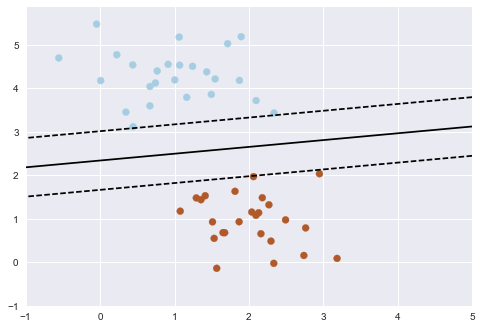

In [3]:
# Import the example plot from the figures directory
from fig_code import plot_sgd_separator
plot_sgd_separator()

这些可能看起来是很小的任务，但是它体现了一个非常重要的概念。我们通过去划分割线，我们已经学习了一个可以**生成**新数据的模型。如果您往这张图上添加一个没有初始没有被分类的点，这个算法现在可以预测它应是一个红色的点还是一个蓝色的点。

如果你希望看到生成这个的源代码，你也可以在`figures`文件夹中打开代码，或者你可以用`%load`命令加载这段代码。

下一个简单的例子我们是一个**回归**的算法，为一组数据拟合一条最佳的直线。

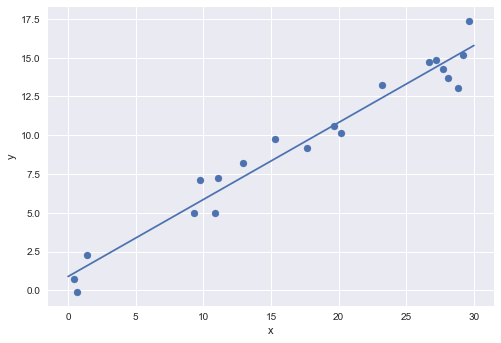

In [4]:
from fig_code import plot_linear_regression
plot_linear_regression()

这也是一个从数据中建立模型的例子，所以这个模型可以被用来生成新的数据。这个模型从训练数据中被**学习**出来，而且可以用来预测测试数据的结果：我们给出一个点的x坐标值，这个模型可以让我们去预测对应的y坐标值。同样的，这看起来是一个简单的例子，但是它是一个机器学习算法的一个基础的操作。

## Scikit-learn中的数据表示

机器学习是从数据中建立模型的，我们将会从怎样让用电脑理解的方式去表示数据开始。同时，我们会用matplotlib的例子讲解如何讲数据用图表的形式显示出来。

在Scikit-learn中，大多数的机器学习算法的数据在二维的数组或者矩阵中存储。这些数据可能是``numpy``数组，在某些情况下也可能是``scipy.sparse``矩阵。数组的大小应该是`[样本数，特征数]`

- **样本数:** 样本的数目。每一个样本都是一个需要处理的独立个体（例如：需要被分类），一个样本可能是一个文档、一幅图片、一段音频、一段视频、一个天文学数据、数据库或者CSV文件中的一行，或者任意一个确定的数值的集合。
- **特征数:** 特征的数目，特征是描述一个样本的数值表达。特征一般是实数，不过在某些情况下也会是布尔值或者是离散数据。

特征数必须提前确定。但是对于给定的样本，特征可以是很大（百万级）的一个零占大多数的集合。这种情况下，`scipy.sparse`矩阵就派上了用场，用这个矩阵比numpy矩阵在存储上会更加高效。

![Data Layout](images/data-layout.png)

(图片来自 [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook))
!

## 一个简单的例子：Iris 数据集

作为简单数据集的例子，我们将会介绍scikit-learn中存储的iris数据集。
数据由3种不同品种的iris组成。
下面是数据集中的3个品种，我们可以通过下面的代码显示出它们：

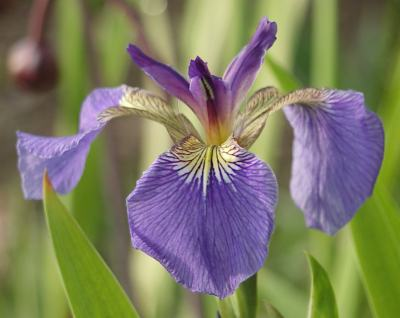

Iris Setosa



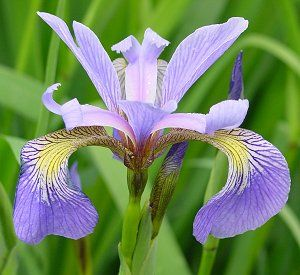

Iris Versicolor



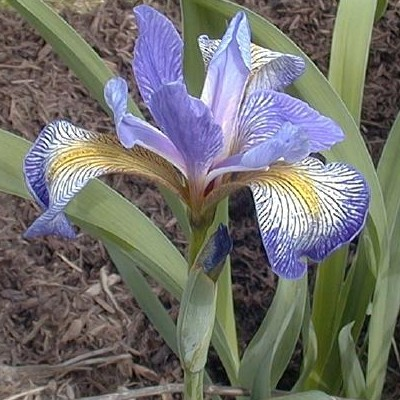

Iris Virginica


In [5]:
from IPython.core.display import Image, display
display(Image(filename='images/iris_setosa.jpg'))
print("Iris Setosa\n")

display(Image(filename='images/iris_versicolor.jpg'))
print("Iris Versicolor\n")

display(Image(filename='images/iris_virginica.jpg'))
print("Iris Virginica")

### 问答：

**如果我们想设计一个算法去分辨iris的品种，数据可能是什么？**

记住：我们需要一个2D的数组，其大小为`[样本数 * 特征数]`

- `样本数`指的是什么？

- `特征数`指的是什么？

记住每一个样本的特征数必须是**固定**的，而且对于每一个样本，特征数``i``必须是一个数值型的元素。

### 用scikit-learn 加载 Iris 数据

Scikit-learn对于Iris数据有一个非常直接表示。数据表示如下：

- Iris 数据集的特征：

    1. 萼片长度(cm)
    2. 萼片宽度(cm)
    3. 花瓣长度(cm)
    4. 花瓣宽度(cm)
    
    
- 预测的目标类别
    
    1. Iris Setosa
    2. Iris Versicolour
    3. Iris Virginica
    
``scikit-learn``嵌入了一个iris CSV文件的拷贝和一个帮助函数去从numpy数组中加载它：

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

In [7]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [8]:
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.data[0])

(150, 4)
[ 5.1  3.5  1.4  0.2]


In [9]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [10]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


这个数据是四维的，但是我们可以使用简单的scatter-plot一次显示出两维的数据：

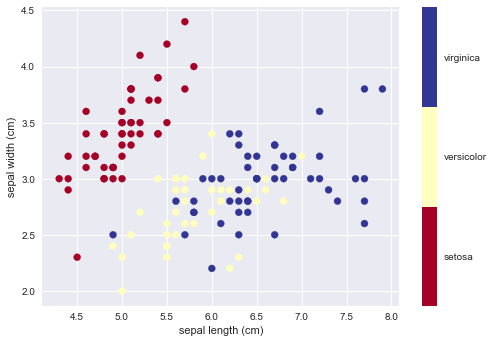

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

### 快速练习：
 
**在上面的脚本中改变** `x_index` **和** `y_index`**， 找到一种可以最大化分隔出三个类别的它们的组合。**

这个练习是**降维算法**的一个预告，我们在之后会看到。

## 其他数据

它们分为如下三种：

- **包内置数据：** 这些小的数据集已经被集成在scikit-learn的安装包里面了，可以用``sklearn.datasets.load_*``去下载它
- **供下载数据：** 这些较大的数据可以供用户们下载，scikit-learn里面已经包含了下载这些数据集的流通道。这些数据可以在``sklearn.datasets.fetch_*``中找到。
- **生成数据：** 通过随机种子，可以通过现有模型随机生成一些数据集。它们可以在``sklearn.datasets.make_*``中找到

你可以通过IPython的TAB自动补全来发现可能的数据集生成和加载工具。在从``sklearn``导入``datasets``之后，
键入

    datasets.load_ + TAB

或者

    datasets.fetch_ + TAB

或者

    datasets.make_ + TAB

可以看到一列函数的组合。

In [13]:
from sklearn import datasets

In [14]:
# Type datasets.fetch_<TAB> or datasets.load_<TAB> in IPython to see all possibilities

# datasets.fetch_

In [15]:
# datasets.load_

在下一节，我们将会使用一些数据集来研究机器学习的基本规则。